In [1]:
import pandas as pd
import numpy as np
import csv
import random as rnd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline

## Read file into dataframe

In [2]:
df = pd.read_csv("regLinPoli2.csv") ##insert your own path

## Divide in train and test

In [3]:
X_train, X_test, Y_train, Y_test = train_test_split(df[df.columns[0:-1]],df[[df.columns[-1]]], train_size=0.75)
#print X_train.columns.values

/home/ricardo/project_directory/pythonVirtualEnv1/local/lib/python2.7/site-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


### I recommend that after manipulating data using pandas and before modelling to convert dataframes into arrays. This may avoid some headaches

In [4]:
X_train=np.asarray(X_train)
X_test=np.asarray(X_test)
Y_train=np.asarray(Y_train)
Y_test=np.asarray(Y_test)

## Procedure for data standardizing

In [5]:
# This procedure is useful for classroom examples. For a real implementation you have to have a separete method 
# for transforming the production data so you can transform it as you get it with the fitted scaler
## The procedure returns a standardized copy of the input data
def normalize(X_train,X_test,Y_train,Y_test,do=True):

    scale_X=preprocessing.StandardScaler()
    scale_y=preprocessing.StandardScaler()
    
    train_X=np.copy(X_train)
    train_y=np.copy(Y_train)
    test_X=np.copy(X_test)
    test_y=np.copy(Y_test)
    if do:
        scale_X.fit(train_X)
        scale_y.fit(train_y)
        train_X=scale_X.transform(train_X)
        train_y=scale_y.transform(train_y)
        test_X=scale_X.transform(test_X)
        test_y=scale_y.transform(test_y)
    return train_X,test_X, train_y, test_y

## Incremental regularized regression procedures

In [6]:
## Transfer function
def salida(w,X):
    return X.dot(w[1:]) +w[0]


In [7]:
## Training function
def entrena(X,y,w,la=0.0,eta=0.01):
    
    for i in range(len(X)):
        error=y[i]-salida(w,X[i])
        w[0]=w[0]+eta*(error)
        w[1:]=w[1:]+eta*(error*X[i])-la*w[1:]
    return w


## Error function

In [8]:
def calcError(X,y,w,w0):
    return np.mean((X.dot(w)+w0-y)**2)

## Use

In [9]:
train_X,test_X,train_y,test_y=normalize(X_train,X_test,Y_train,Y_test)

In [10]:
w=np.asarray([rnd.random() for i in range(1+len(train_X[0]))])
for i in range(100):
    w=entrena(train_X,train_y,w,la=0.00)
len(w)

39

In [11]:
## flatten here to convert y from a matrix to a vector. Only 1 response variable
print calcError(train_X,train_y.flatten(),w[1:],w[0])
print calcError(test_X,test_y.flatten(),w[1:],w[0])

0.481356568422
0.508459044086


In [12]:
def partition(X_tr, k):
    indice = np.array([np.random.randint(1,k+1) for i in range(len(X_tr))])
    return indice

In [13]:
Partition = partition(X_train, 10)

In [14]:
def multTrain(lamdas,X_train,Y_train,iters):
    w = np.random.rand(len(X_train[0])+1)*100
    error_array = list()
    Mean_error_array = list()
    max_len = max(Partition)+1
    for element in lambdas:
        for k in range(1,max_len):
            trainx1,testx1,trainy1,testy1 = normalize(X_train[Partition!=k],X_train[Partition==k],Y_train[Partition!=k],Y_train[Partition==k])
            for r in range(0,iters):
                w = entrena(trainx1,trainy1,w,element)
            error_array.append([calcError(testx1,testy1.flatten(),w[1:],w[0])])    
        Mean_error_array.append(np.mean(error_array))
    return w, Mean_error_array

In [15]:
lambdas = np.linspace(0, 0.05, 100, endpoint=False)

In [16]:
LambdasErrorArray = multTrain(lambdas, X_train, Y_train,10)[1]
len(LambdasErrorArray)

100

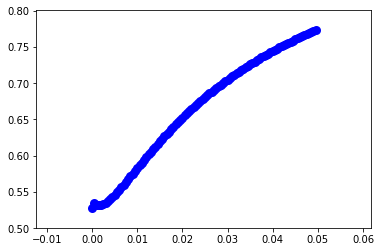

In [19]:
plt.scatter(lambdas, LambdasErrorArray, color='blue', linewidth=3)
plt.show()